### 【例 6.1】
### 基于 BP 神经网络的银行客户流失预测。


In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot  as plt
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['STZhongsong']    # 指定默认字体：解决plot不能显示中文问题

In [2]:
# 读取训练数据和测试数据
df = pd.read_csv("select-data.csv")  # 加载训练数据集
df_test = pd.read_csv("scalar-test.csv")  # 加载测试数据集

print("构建向量.........")
# 构建特征向量和目标向量
train = []  # 用于存储特征数据的列表
target = []  # 用于存储目标变量的列表

# 遍历数据集中的每一行，构建特征向量
for i in range(0, len(df["EstimatedSalary"])):
    mid = []  # 临时列表，用于存储单个样本的所有特征
    
    # 依次添加各个特征
    mid.append(df["Geography"][i])      # 地理位置特征
    mid.append(df["Gender"][i])         # 性别特征
    mid.append(df["EB"][i])             # EB特征
    mid.append(df["Age"][i])            # 年龄特征
    mid.append(df["EstimatedSalary"][i])# 预估薪资特征
    mid.append(df["NumOfProducts"][i])  # 产品数量特征
    mid.append(df["CreditScore"][i])    # 信用分数特征
    mid.append(df["Tenure"][i])         # 任期特征
    mid.append(df["HasCrCard"][i])      # 是否持有信用卡特征
    mid.append(df["IsActiveMember"][i]) # 是否为活跃会员特征
    
    target.append(df["Exited"][i])      # 添加目标变量（是否流失）
    train.append(mid)                    # 将当前样本的特征向量添加到训练集

# 将列表转换为numpy数组，便于后续处理
train = np.array(train)    # 将特征数据转换为numpy数组
target = np.array(target)  # 将目标变量转换为numpy数组


构建向量.........


In [3]:
df.head()

,Unnamed: 0,Age,CreditScore,EB,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,Tenure,Exited
0,0,0.324324,0.538,0.000000,0.506735,0,0.0,1,1,0.000000,0.2,1
1,1,0.310811,0.516,0.000070,0.562709,0,0.5,0,1,0.000000,0.1,0
2,2,0.324324,0.304,0.000132,0.569654,0,0.0,1,0,0.666667,0.8,1
3,3,0.283784,0.698,0.000000,0.469120,0,0.0,0,0,0.333333,0.1,0
4,4,0.337838,1.000,0.000150,0.395400,0,0.5,1,1,0.000000,0.2,0


In [4]:
df_test.head()

,Unnamed: 0,Geography,Gender,EB,Age,EstimatedSalary,NumOfProducts,CreditScore,Tenure,HasCrCard,IsActiveMember,Exited
0,0,0.0,1.0,0.000000,0.178082,0.101298,0.000000,0.411157,0.1,0.0,1.0,0.0
1,1,0.0,1.0,0.000000,0.219178,0.019060,0.000000,0.419421,0.4,0.0,1.0,0.0
2,2,0.0,0.0,0.000000,0.027397,0.644939,0.333333,0.626033,0.7,1.0,0.0,0.0
3,3,0.0,1.0,0.004121,0.287671,0.406481,0.000000,0.677686,0.4,1.0,1.0,0.0
4,4,0.5,1.0,0.001127,0.136986,0.939612,0.000000,0.285124,1.0,1.0,1.0,0.0


In [ ]:
# 初始化测试数据列表和目标值列表
test = []
test_target = []

# 遍历测试数据集中的每一行
for i in range(0, len(df_test["EstimatedSalary"])):
    # 创建临时列表存储当前行的特征
    mid = []
    # 添加地理位置信息
    mid.append(df_test["Geography"][i])
    # 添加性别信息
    mid.append(df_test["Gender"][i])
    # 添加教育背景信息
    mid.append(df_test["EB"][i])
    # 添加年龄信息
    mid.append(df_test["Age"][i])
    # 添加预估薪资信息
    mid.append(df_test["EstimatedSalary"][i])
    # 添加产品数量信息
    mid.append(df_test["NumOfProducts"][i])
    # 添加信用分数信息
    mid.append(df_test["CreditScore"][i])
    # 添加任期信息
    mid.append(df_test["Tenure"][i])
    # 添加是否持有信用卡信息
    mid.append(df_test["HasCrCard"][i])
    # 添加是否活跃会员信息
    mid.append(df_test["IsActiveMember"][i])
    
    # 将当前行的目标值添加到test_target列表
    test_target.append(df_test["Exited"][i])
    # 将当前行的所有特征添加到test列表
    test.append(mid)
# 将列表转换为numpy数组以便后续处理
test = np.array(test)
test_target = np.array(test_target)
# train = np.trunc(train * 100)

In [6]:
# 使用sklearn.utils中的shuffle函数随机打乱训练数据和对应标签
# 这样可以避免数据的顺序性对模型训练造成影响
train, target = shuffle(train, target)

# 将标签数据重塑为二维数组形式 (n_samples, 1)
# reshape(-1,1)中的-1表示自动计算该维度的大小
target = target.reshape(-1, 1)
test_target = test_target.reshape(-1, 1)

# 使用OneHotEncoder进行独热编码转换
# 独热编码将类别型数据转换为二进制向量形式
# 例如: 类别[1,2,3] 转换为 [[1,0,0], [0,1,0], [0,0,1]]
enc = OneHotEncoder()

# 对测试集标签进行独热编码
enc.fit(test_target)  # 拟合编码器
test_target = enc.transform(test_target).toarray()  # 转换并转为密集数组

# 对训练集标签进行独热编码
enc.fit(target)  # 重新拟合编码器
target = enc.transform(target).toarray()  # 转换并转为密集数组

# 再次拟合测试集标签(注意:这行代码可能是多余的)
enc.fit(test_target)

OneHotEncoder()

In [7]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.compat.v1.disable_v2_behavior()

In [9]:
# 定义输入占位符
x = tf.placeholder(tf.float32, shape=(None, 10))
# # 二分类问题 [0,1]
y = tf.placeholder(tf.float32, shape=(None, 2))
keep = tf.placeholder(tf.float32)

# 定义网络结构
# layer1
var1 = tf.Variable(tf.truncated_normal([10, 256], stddev=0.1))
bias1 = tf.Variable(tf.zeros([256]))
hc1 = tf.add(tf.matmul(x, var1), bias1)
h1 = tf.sigmoid(hc1)
h1 = tf.nn.dropout(h1, keep_prob=keep)


# layer2
var2 = tf.Variable(tf.truncated_normal([256, 256], stddev=0.1))
bias2 = tf.Variable(tf.zeros([256]))
hc2 = tf.add(tf.matmul(h1, var2), bias2)
h2 = tf.sigmoid(hc2)
h2 = tf.nn.dropout(h2, keep_prob=keep)

# layer3
var3 = tf.Variable(tf.truncated_normal([256, 2], stddev=0.1))
bias3 = tf.Variable(tf.zeros([2]))
hc3 = tf.add(tf.matmul(h2, var3), bias3)
h3 = tf.nn.softmax(hc3)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
# 定义损失
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=h3, labels=y))
tf.summary.scalar('loss', loss)

# 定义正确率
ac = tf.cast(tf.equal(tf.argmax(h3, 1), tf.argmax(y, 1)), tf.float32)
acc = tf.reduce_mean(ac)
tf.summary.scalar('accuracy', acc)

# 定义优化器
optimzer = tf.train.AdamOptimizer(1e-3).minimize(loss)

merge_summary = tf.summary.merge_all()

isTrain = 1

In [11]:
# 定义损失
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=h3, labels=y))
tf.summary.scalar('loss', loss)

# 定义正确率
ac = tf.cast(tf.equal(tf.argmax(h3, 1), tf.argmax(y, 1)), tf.float32)
acc = tf.reduce_mean(ac)
tf.summary.scalar('accuracy', acc)

# 定义优化器
optimzer = tf.compat.v1.train.AdamOptimizer(1e-3).minimize(loss)

merge_summary = tf.compat.v1.summary.merge_all()

isTrain = 1

正在训练.....
epoch:0   train_acc:0.49993864   test_acc:0.26   loss:0.6997368
epoch:50   train_acc:0.6356608   test_acc:0.559   loss:0.6836501
epoch:100   train_acc:0.63136584   test_acc:0.631   loss:0.665583
epoch:150   train_acc:0.6336974   test_acc:0.634   loss:0.6426724
epoch:200   train_acc:0.63517   test_acc:0.651   loss:0.6355466
epoch:250   train_acc:0.6424101   test_acc:0.647   loss:0.63177973
epoch:300   train_acc:0.649773   test_acc:0.658   loss:0.6289923
epoch:350   train_acc:0.6533317   test_acc:0.66   loss:0.62627304
epoch:400   train_acc:0.658363   test_acc:0.661   loss:0.6236794
epoch:450   train_acc:0.6627807   test_acc:0.664   loss:0.6209134
epoch:500   train_acc:0.6657258   test_acc:0.665   loss:0.61807877
epoch:550   train_acc:0.6700209   test_acc:0.668   loss:0.615252
epoch:600   train_acc:0.6737023   test_acc:0.681   loss:0.6121102
epoch:650   train_acc:0.67787457   test_acc:0.681   loss:0.6089665
epoch:700   train_acc:0.67812   test_acc:0.685   loss:0.6059452
epoch:7

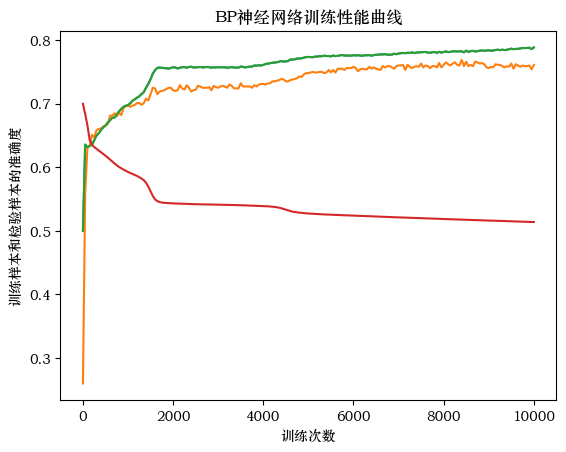

RuntimeError: Attempted to use a closed Session.

In [ ]:
# 定义训练
print("正在训练.....")
saver = tf.train.Saver(max_to_keep=1)

with tf.Session() as sess:
    if isTrain:
        init_op = tf.global_variables_initializer()
        sess.run(init_op)
        summary_writer = tf.summary.FileWriter('./logs/', sess.graph)
        nepoch=[]
        trainacc=[]
        testacc=[]
        loss1=[]
        for i in range(0, 10001):
             
            sess.run(optimzer, feed_dict={x: train, y: target, keep: 0.5})
            train_summary = sess.run(merge_summary, feed_dict={x: train, y: target, keep: 1})
            summary_writer.add_summary(train_summary, i)
           
            if i % 50 == 0:
                accu = sess.run(acc, feed_dict={x: train, y: target, keep: 1})
                accuT = sess.run(acc, feed_dict={x: test, y: test_target, keep: 1})
                losss = sess.run(loss, feed_dict={x: train, y: target, keep: 1})
               
                print("epoch:" + str(i) + "   train_acc:" + str(accu) + "   test_acc:" + str(accuT) + "   loss:" + str(
                    losss))
      
                nepoch.append(i)
                trainacc.append(accu)
                testacc.append(accuT)
                loss1.append(losss)
           
        plt.title("BP神经网络训练性能曲线")
        plt.xlabel('训练次数')
        plt.ylabel('训练样本和检验样本的准确度')
        plt.plot(nepoch,trainacc,nepoch,testacc)
        plt.plot(nepoch,trainacc,nepoch,loss1)
        plt.show()

saver.save(sess, './model/bank.ckpt', global_step=i)